In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
# There are 10 image classes in this dataset and each class has a mapping corresponding to the following labels:
#0 T-shirt/top
#1 Trouser
#2 pullover
#3 Dress
#4 Coat
#5 sandals
#6 shirt
#7 sneaker
#8 bag
#9 ankle boot

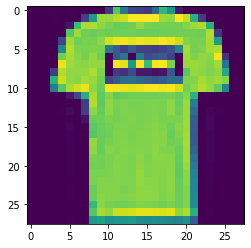

In [3]:
plt.imshow(x_train[1])

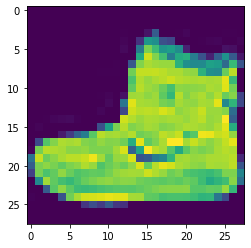

In [4]:
plt.imshow(x_train[0])

In [5]:
# Next, we will preprocess the data by scaling the pixel values to be between 8 and 1, and then reshaping the images to be 28x28 pixels.

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# 28, 28 comes from width, height, 1 comes from the number of channels
# -1 means that the length in that dimension is inferred.
# This is done based on the constraint that the number of elements in an ndarray or Tensor when reshaped must remain the same.

# each image is a row vector (784 elements) and there are lots of such rows (let it be n, so there are 784n elements). So TensorFlow can

# converting the training_images array to 4 dimensional array with sizes 60068, 28, 28, 1 for @th to 3rd dimension

In [7]:
# We will use a convolutional neural network (CNN) to classify the fashion items.
# The CNN will consist of multiple convolutional layers followed by max pooling,
# dropout, and dense layers. Here is the code for the model:

model = keras.Sequential([
  keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
  # 32 filters (default), randomly initialized
  # 3*3 is Size of Filter
  # 28,28,1 size of Input Image
  # No zero-padding: every output 2 pixels less in every dimension
  # in Paramter shwon 320 is value of weights: (3x3 filter weights + 32 bias) * 32 filters
  # 32*3*3-288(Total)+32(bias)= 320

  keras.layers.MaxPooling2D((2,2)),
  # It shown 13 * 13 size image with 32 channel or filter or depth.

  keras.layers.Dropout(0.25),
  # Reduce Overfitting of Training sample drop out 25% Neuron

  keras.layers.Conv2D(64, (3,3), activation='relu'),
  # Deeper layers use 64 filters
  # 3*3 is Size of Filter
  # Observe how the input image on 28x28x1 is transformed to a 3x3x64 feature map
  # 13(Size)-3(Filter Size )+1(bias)=11 Size for Width and Height with 64 Depth or filtter or channel
  # in Paramter shwon 18496 is value of weights: (3x3 filter weights + 64 bias) * 64 filters
  # 64*3*3=576+1=577%32 + 32(bias)=18496

  keras.layers.MaxPooling2D((2,2)),
  # It shown 5 * 5 size image with 64 channel or filter or depth.

  keras.layers.Dropout(0.25),

  keras.layers.Conv2D(128, (3,3), activation='relu'),
  # Deeper layers use 128 filters
  # 3*3 is Size of Filter
  # Observe how the lnput image on 28x28x1 is transformed to a 3x3x128 feature map
  # It show 5(Size)-3(Filter Size )+1(bias)=3 Size for Width and Height with 64 Depth or filtter or channel
  # 128*3*3=1152+1=1153*64 + 64(blas)= 73856

  # To classify the images, we still need a Dense and Softmax layer.
  # We need to flatten the 3x3x128 feature map to a vector of size 1152
  # https://medium.com/@iamvarman/how-to-calculate-the-number-of-parameters-in-the-cnn-5bd55364d7ca

  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  # 128 Size of Node in Dense Layer
  # 1152*128 = 147584

  keras.layers.Dropout(0.25),
  keras.layers.Dense(10, activation='softmax')
  # 10 Size of Node another Dense Layer
  # 128*10+1@ bias= 1290
])

model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [8]:
# Compile and Train the Model
# After defining the model, we will compile it and train it on the training data.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))
# 1875 is a number of batches. By default batches contain 32 samles.60000
     

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.5732 - accuracy: 0.7880 - val_loss: 0.3825 - val_accuracy: 0.8602
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3751 - accuracy: 0.8625 - val_loss: 0.3360 - val_accuracy: 0.8791
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3282 - accuracy: 0.8805 - val_loss: 0.3017 - val_accuracy: 0.8902
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3006 - accuracy: 0.8896 - val_loss: 0.2865 - val_accuracy: 0.8926
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2785 - accuracy: 0.8977 - val_loss: 0.2724 - val_accuracy: 0.9003
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2652 - accuracy: 0.9016 - val_loss: 0.2586 - val_accuracy: 0.9042
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2558 - accuracy: 0.9043 - val_loss: 0.2460 -

In [9]:
# Finally, we will evaluate the performance of the model on the test data.
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
     

313/313 [==============================] - 1s 4ms/step - loss: 0.2407 - accuracy: 0.9113
Test accuracy: 0.911300003528595
